In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [20]:
file_name = '/content/KPMG_VI_New_raw_data_update_final.xlsx'
print(pd.ExcelFile(file_name).sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


# ***Exploring CustomerDemographic***

In [21]:
cust_demo_df = pd.read_excel(file_name, header=1, sheet_name='CustomerDemographic')
cust_demo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [22]:
cust_demo_df.shape

(4000, 13)

In [35]:
cust_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [23]:
cust_demo_df[cust_demo_df.duplicated()].sum()

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
default                                0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

In [24]:
print('customer_id blanks:', pd.isna(cust_demo_df['customer_id']).sum())

customer_id blanks: 0


In [25]:
pd.notna(cust_demo_df['customer_id'].unique()).sum()

4000

In [26]:
print('first_name blanks:', pd.isna(cust_demo_df['first_name']).sum())
pd.notna(cust_demo_df['first_name'].unique()).sum()

first_name blanks: 0


3139

In [27]:
print('last_name blanks:', pd.isna(cust_demo_df['last_name']).sum())
pd.notna(cust_demo_df['last_name'].unique()).sum()

last_name blanks: 125


3725

In [38]:
cust_demo_df['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64


***Gender column has inconsistent values, we need to replace them with their appropriate values.***

In [39]:
# Replace inconsistent values with appropriate values
cust_demo_df['gender'] = cust_demo_df['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

In [41]:
cust_demo_df['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

gender: ['Female' 'Male' 'Unspecified']
blanks: 0


(array([2039.,    0.,    0.,    0.,    0., 1873.,    0.,    0.,    0.,
          88.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

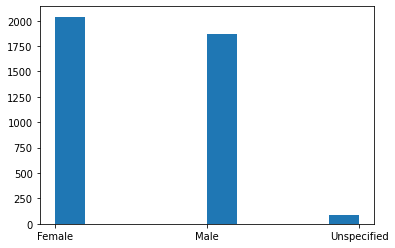

In [42]:
print('gender:', cust_demo_df['gender'].unique())
print('blanks:', pd.isna(cust_demo_df['gender']).sum())
plt.hist(cust_demo_df['gender'][pd.notna(cust_demo_df['gender'])])

In [29]:
cust_demo_df['past_3_years_bike_related_purchases'].describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [30]:
print('past_3_years_bike_related_purchases blanks:', pd.isna(cust_demo_df['past_3_years_bike_related_purchases']).sum())

past_3_years_bike_related_purchases blanks: 0


In [31]:
cust_demo_df['DOB'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [32]:
print('DOB blanks:', pd.isna(cust_demo_df['DOB']).sum())

DOB blanks: 87


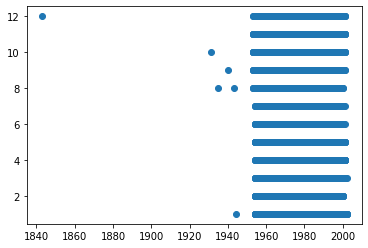

In [33]:
plt.scatter([d.year for d in cust_demo_df['DOB']], [d.month for d in cust_demo_df['DOB']])

In [43]:
from datetime import datetime
cust_demo_df['age'] = (datetime.now() - cust_demo_df['DOB']) // 365

In [44]:
cust_demo_df['age'].describe()

count                           3913
mean      43 days 20:09:08.848324341
std       12 days 19:17:57.825070499
min       19 days 03:54:40.358674449
25%       34 days 04:53:51.043605956
50%       43 days 19:33:37.892921024
75%       53 days 07:39:32.961414175
max      177 days 11:44:09.125797736
Name: age, dtype: object

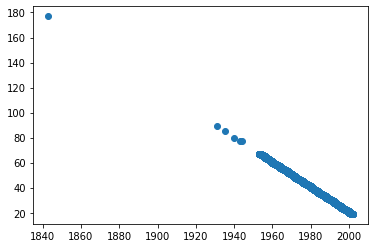

In [45]:
plt.scatter([d.year for d in cust_demo_df['DOB']], cust_demo_df['age'].dt.days)

In [48]:
print('job_title:', cust_demo_df['job_title'].unique())
print('blanks:', pd.isna(cust_demo_df['job_title']).sum())

job_title: ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurse' 'Biostatistician II' 'Computer Systems Analyst II'
 'Software Test Engineer II' 'Paralegal' 'VP Sales'
 'Chief Design Engineer' 'Office Assistant III'
 'Physical Therapy Assistant' 'Help Desk Operator' 'Web D

In [52]:
print('job_industry_category:', cust_demo_df['job_industry_category'].unique())
print('blanks:', pd.isna(cust_demo_df['job_industry_category']).sum())

job_industry_category: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
blanks: 656


wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
blanks: 0


(array([2000.,    0.,    0.,    0.,    0.,  979.,    0.,    0.,    0.,
        1021.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

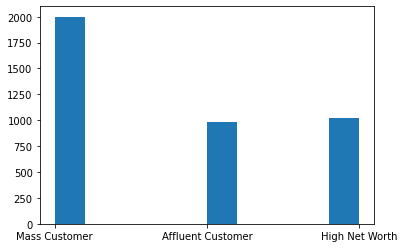

In [50]:
print('wealth_segment:', cust_demo_df['wealth_segment'].unique())
print('blanks:', pd.isna(cust_demo_df['wealth_segment']).sum())
plt.hist(cust_demo_df['wealth_segment'][pd.notna(cust_demo_df['wealth_segment'])])

In [54]:
cust_demo_df['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

deceased_indicator: ['N' 'Y']
blanks: 0


(array([3.998e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

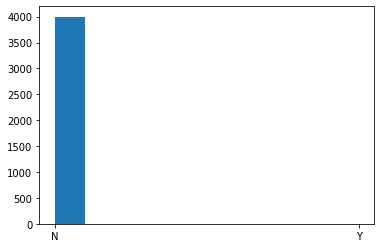

In [55]:
print('deceased_indicator:', cust_demo_df['deceased_indicator'].unique())
print('blanks:', pd.isna(cust_demo_df['deceased_indicator']).sum())
plt.hist(cust_demo_df['deceased_indicator'][pd.notna(cust_demo_df['deceased_indicator'])])

In [56]:
cust_demo_df['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

owns_car: ['Yes' 'No']
blanks: 0


(array([2024.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1976.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

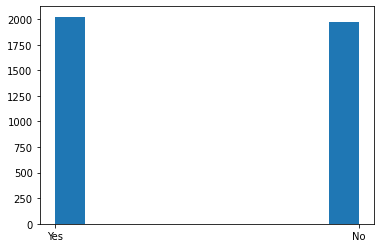

In [57]:
print('owns_car:', cust_demo_df['owns_car'].unique())
print('blanks:', pd.isna(cust_demo_df['owns_car']).sum())
plt.hist(cust_demo_df['owns_car'][pd.notna(cust_demo_df['owns_car'])])

In [58]:
cust_demo_df['tenure'].describe()

count    3913.000000
mean       10.657041
std         5.660146
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

In [59]:
print('tenure blanks:', pd.isna(cust_demo_df['tenure']).sum())

tenure blanks: 87


In [65]:
cust_demo_df['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
â°â´âµâââ                                  53
                                         ... 
'"''''"                                    31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

***Values in the default column dont arent correct, we would drop the column.***

In [66]:
cust_demo_df = cust_demo_df.drop('default', axis = 1)

In [67]:
cust_demo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67 days 14:33:47.755934723
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40 days 09:49:44.468263490
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67 days 07:59:16.523058010
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,59 days 15:01:24.742236093
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,44 days 00:09:47.755934723


In [68]:
cust_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   customer_id                          4000 non-null   int64          
 1   first_name                           4000 non-null   object         
 2   last_name                            3875 non-null   object         
 3   gender                               4000 non-null   object         
 4   past_3_years_bike_related_purchases  4000 non-null   int64          
 5   DOB                                  3913 non-null   datetime64[ns] 
 6   job_title                            3494 non-null   object         
 7   job_industry_category                3344 non-null   object         
 8   wealth_segment                       4000 non-null   object         
 9   deceased_indicator                   4000 non-null   object         
 10  

#***Exploring CustomerAddress***

In [69]:
cust_addr_df = pd.read_excel(file_name, header=1, sheet_name='CustomerAddress')
cust_addr_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [70]:
cust_addr_df.shape

(3999, 6)

In [72]:
cust_addr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [73]:
cust_addr_df[cust_addr_df.duplicated()].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [74]:
print('customer_id blanks:', pd.isna(cust_addr_df['customer_id']).sum())

customer_id blanks: 0


In [75]:
pd.notna(cust_addr_df['customer_id'].unique()).sum()

3999

In [76]:
print('customer_ids not in demographics dataset:',\
      sum([(1 if (i not in cust_demo_df['customer_id']) else 0) for i in cust_addr_df['customer_id']]))

customer_ids not in demographics dataset: 4


In [77]:
print('address blanks:', pd.isna(cust_addr_df['address']).sum())

address blanks: 0


In [78]:
print('postcode blanks:', pd.isna(cust_addr_df['postcode']).sum())

postcode blanks: 0


state: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
blanks: 0


(array([  86.,    0.,  838.,    0.,    0.,  939.,    0., 2054.,    0.,
          82.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

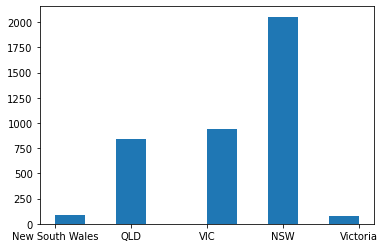

In [79]:
print('state:', cust_addr_df['state'].unique())
print('blanks:', pd.isna(cust_addr_df['state']).sum())
plt.hist(cust_addr_df['state'][pd.notna(cust_addr_df['state'])])

In [80]:
print('country:', cust_addr_df['country'].unique())
print('blanks:', pd.isna(cust_addr_df['country']).sum())

country: ['Australia']
blanks: 0


In [81]:
cust_addr_df['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

property_valuation blanks: 0


(array([297., 186., 214., 225., 238., 493., 646., 647., 577., 476.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

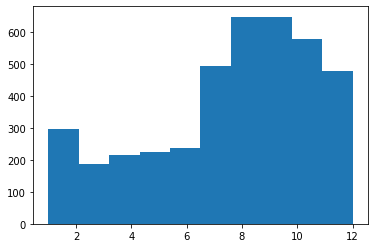

In [82]:
print('property_valuation blanks:', pd.isna(cust_addr_df['property_valuation']).sum())
plt.hist(cust_addr_df['property_valuation'], bins=10)

## ***Exploring Transactions***

In [83]:
txns_df = pd.read_excel(file_name, header=1, sheet_name='Transactions')
txns_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [84]:
txns_df.shape

(20000, 13)

In [85]:
txns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [86]:
txns_df[txns_df.duplicated()].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [105]:
txns_df['transaction_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [87]:
#convert date columns from integer to datetime
txns_df['transaction_date'] = pd.to_datetime(txns_df['transaction_date'], unit='s')
txns_df['transaction_date'].head()

0   2017-02-25
1   2017-05-21
2   2017-10-16
3   2017-08-31
4   2017-10-01
Name: transaction_date, dtype: datetime64[ns]

In [88]:
#convert date columns from integer to datetime
txns_df['product_first_sold_date'] = pd.to_datetime(txns_df['product_first_sold_date'], unit='s')
txns_df['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]


***The integers in the date columns are not correct as it shows everything happening the same day at different times. We would need to refer back to the author of the data to seek more clarification on how the data was collected.***

In [89]:
txns_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [90]:
#identify missing values
txns_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


*We can decide to drop missing values depending on the objective of our analysis*

In [91]:
txns_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [95]:
txns_df['list_price'].describe()

count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

In [96]:
print('list_price blanks:', pd.isna(txns_df['list_price']).sum())

list_price blanks: 0


In [97]:
txns_df['standard_cost'].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [98]:
print('standard_cost blanks:', pd.isna(txns_df['standard_cost']).sum())

standard_cost blanks: 197


In [99]:
txns_df['profit'] = txns_df['list_price'] - txns_df['standard_cost']
txns_df['profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: profit, dtype: float64

In [100]:
print('transaction_id blanks:', pd.isna(txns_df['transaction_id']).sum())

transaction_id blanks: 0


In [101]:
print('product_id blanks:', pd.isna(txns_df['product_id']).sum())

product_id blanks: 0


In [102]:
print('customer_id blanks:', pd.isna(txns_df['customer_id']).sum())

customer_id blanks: 0


In [103]:
pd.notna(txns_df['customer_id'].unique()).sum()

3494

In [104]:
print('customer_ids not in demographics dataset:', \
      sum([(1 if (i not in cust_demo_df['customer_id']) else 0) for i in cust_addr_df['customer_id']]))
print('customer_ids not in addresses dataset:', \
      sum([(1 if (i not in cust_demo_df['customer_id']) else 0) for i in txns_df['customer_id']]))

customer_ids not in demographics dataset: 4
customer_ids not in addresses dataset: 3


In [93]:
txns_df['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

order_status: ['Approved' 'Cancelled']
blanks: 0


(array([19821.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   179.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

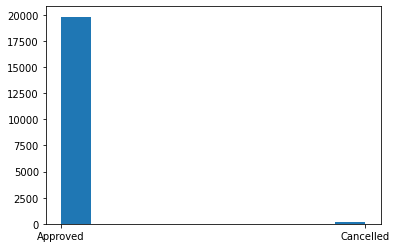

In [94]:
print('blanks:', pd.isna(txns_df['order_status']).sum())
plt.hist(txns_df['order_status'][pd.notna(txns_df['order_status'])])

In [107]:
txns_df['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

online_order: [ 0.  1. nan]
blanks: 360


(array([9811.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9829.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

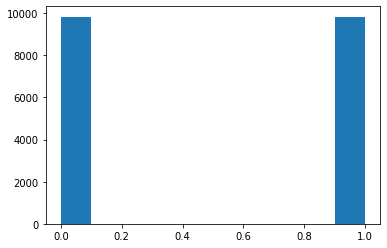

In [108]:
print('blanks:', pd.isna(txns_df['online_order']).sum())
plt.hist(txns_df['online_order'][pd.notna(txns_df['online_order'])])

In [112]:
txns_df['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

blanks: 197


(array([4253.,    0., 2990.,    0., 3043.,    0., 2910.,    0., 3312.,
        3295.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

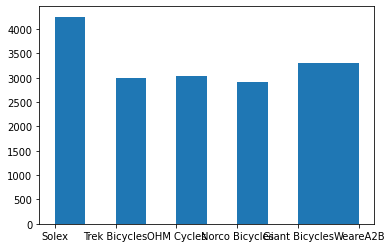

In [114]:
print('blanks:', pd.isna(txns_df['brand']).sum())
plt.hist(txns_df['brand'][pd.notna(txns_df['brand'])])

In [116]:
txns_df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

blanks: 197


(array([14176.,     0.,     0.,  3970.,     0.,     0.,   423.,     0.,
            0.,  1234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

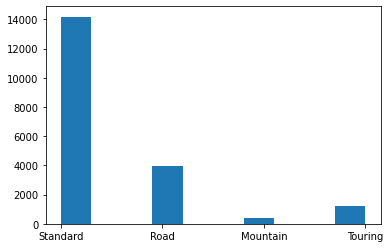

In [117]:
print('blanks:', pd.isna(txns_df['product_line']).sum())
plt.hist(txns_df['product_line'][pd.notna(txns_df['product_line'])])

In [119]:
txns_df['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

blanks: 197


(array([13826.,     0.,     0.,     0.,     0.,  2964.,     0.,     0.,
            0.,  3013.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

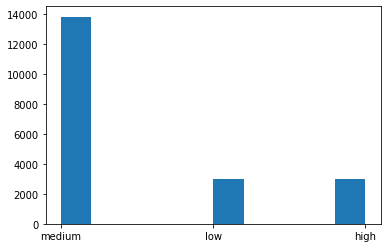

In [120]:
print('blanks:', pd.isna(txns_df['product_class']).sum())
plt.hist(txns_df['product_class'][pd.notna(txns_df['product_class'])])

In [122]:
txns_df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

blanks: 197


(array([12990.,     0.,     0.,     0.,     0.,  3976.,     0.,     0.,
            0.,  2837.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

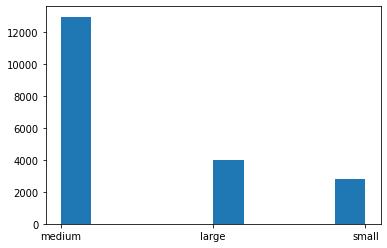

In [123]:
print('blanks:', pd.isna(txns_df['product_size']).sum())
plt.hist(txns_df['product_size'][pd.notna(txns_df['product_size'])])

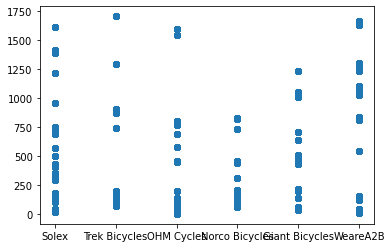

In [124]:
plt.scatter(txns_df['brand'][pd.notna(txns_df['brand'])], txns_df['profit'][pd.notna(txns_df['brand'])])


 ***All the columns appear to have consistent and correct information.***

## ***Exploring NewCustomerlist***

In [125]:
new_cust_list_df = pd.read_excel(file_name, header=1, sheet_name='Transactions')
new_cust_list_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [126]:
new_cust_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [127]:
new_cust_list_df.shape

(20000, 13)

In [129]:
# Check for null values
new_cust_list_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [131]:
# Checking for duplicate values
new_cust_list_df[new_cust_list_df.duplicated()].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

***There are no duplicate values in the dataset.***

In [136]:
new_cust_list_df['transaction_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [137]:
#convert date columns from integer to datetime
new_cust_list_df['transaction_date'] = pd.to_datetime(new_cust_list_df['transaction_date'], unit='s')
new_cust_list_df['transaction_date'].head()

0   2017-02-25
1   2017-05-21
2   2017-10-16
3   2017-08-31
4   2017-10-01
Name: transaction_date, dtype: datetime64[ns]

In [138]:
#convert date columns from integer to datetime
new_cust_list_df['product_first_sold_date'] = pd.to_datetime(new_cust_list_df['product_first_sold_date'], unit='s')
new_cust_list_df['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]


***The integers in the date columns are not correct as it shows everything happening the same day at different times. We would need to refer back to the author of the data to seek more clarification on how the data was collected.***